# Projeto II -  Futuro dos Dados e Aplicação de Big Data

Júlio Cézar de Souza Barbosa (1904612)

Rickson das Neves Tavares (2072486)

# Avaliação 1 - Introdução e Fundamentação Teórica (Primeira parte): Descrição do Problema

### Prevendo Ações com Machine Learning

O mercado de ações é algo bem complexo, pois, existem diversos fatores que influenciam no preço dos ativos. Fatores estes que sao difíceis de prever, ou ainda, que estão fora do controle até mesmo de profissionais da área. Dessa forma utilizaremos Machine Learning para nos ajudar a prever ações da bolsa de valores.

### Objetivo

Esse projeto tem como objetivo aplicar algoritmos de machine learning para prever ações da bolsa de valores.

### Especificação Técnica

Para um melhor resultado do modelo foi realizado um ETL de dados históricos extraídos do site da IBOVESPA do ano de 2020.

# Avaliação 2 - Metodologia, Resultados e Discussão (Segunda parte): Preparação dos Dados

### Realizando o ETL dos dados históricos

In [3]:
#ETL dos dados IBOVESPA
import pandas as pd

In [ ]:
colspecs = [(2,10),
             (10,12),
             (12,24),
             (27,39),
             (56,69),
             (69,82),
             (82,95),
             (108,121),
             (152,170),
             (170,188)
]

names = ['data_pregao', 'codbi', 'sigla_acao', 'nome_acao', 'preco_abertura', 'preco_maximo', 'preco_minimo', 'preco_fechamento', 'qtd_negocios', 'volume_negocios']

dados = pd.read_fwf('COTAHIST_A2020.txt', colspecs = colspecs, names = names, skiprows = 1)

dados

In [ ]:
#Filtrando ações padrões
dados = dados[dados['codbi']== 2]
dados = dados.drop(['codbi'], 1)
dados

In [ ]:
#Ajustando data
dados['data_pregao'] = pd.to_datetime(dados['data_pregao'], format = '%Y%m%d')
dados

In [ ]:
#Ajuste dos campos numéricos
dados['preco_abertura'] = (dados['preco_abertura']/100)
dados['preco_maximo'] = (dados['preco_maximo']/100)
dados['preco_minimo'] = (dados['preco_minimo']/100)                     
dados['preco_fechamento'] = (dados['preco_fechamento']/100)
dados

In [ ]:
dados.dtypes

In [ ]:
#Salvando os dados extraídos e filtrados
dados.to_csv('dadosacoes.csv')

### Utilizando os dados filtrados

In [1]:
#importando as bibliotecas
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
#lendo o csv com os arquivos das ações

df = pd.read_csv("dadosacoes.csv")
df

,id,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios
0,0,2020-01-02,AALR3,ALLIAR,18.29,19.00,18.28,19.00,585800.0,1.094620e+09
1,1,2020-01-02,AAPL34,APPLE,120.00,121.34,120.00,121.34,12700.0,1.533380e+08
2,2,2020-01-02,ABCB4,ABC BRASIL,20.00,20.30,19.82,20.30,870400.0,1.745788e+09
3,3,2020-01-02,ABEV3,AMBEV S/A,18.86,19.25,18.78,19.20,16011300.0,3.062348e+10
4,4,2020-01-02,ADHM3,ADVANCED-DH,2.55,2.55,2.35,2.48,193400.0,4.719270e+07
...,...,...,...,...,...,...,...,...,...,...
122221,294499,2020-12-28,Z1TO34,ZTO EXPRESS,36.72,36.72,36.72,36.72,37.0,1.358640e+05
122222,294500,2020-12-29,Z1TO34,ZTO EXPRESS,36.31,36.31,36.31,36.31,100.0,3.631000e+05
122223,294501,2020-12-30,Z1TO34,ZTO EXPRESS,38.09,38.09,37.50,37.50,61.0,2.295170e+05
122224,294502,2020-12-23,Z1TS34,ZOETIS INC,209.18,209.18,209.18,209.18,50.0,1.045900e+06


## Análise exploratória e Pré-Processamento dos dados

In [5]:
#Filtrando ações do Itau
df_itau = df[df['sigla_acao'] == 'ITUB4']
df_itau

Text(0.5, 0, 'data_pregao')

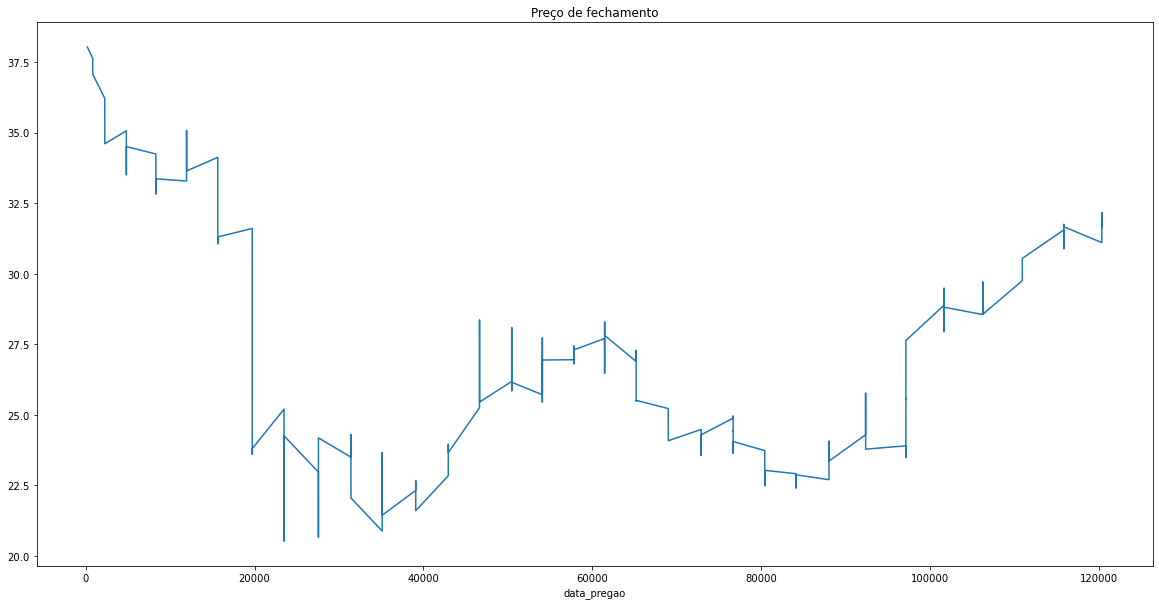

In [11]:
plt.figure(figsize=(20, 10))
plt.title('Preço de fechamento')
plt.plot(df_itau['preco_fechamento'])
plt.xlabel('data_pregao')

In [ ]:
#Verificando o tipo das variáveis
df_itau.dtypes

In [6]:
#Mudando o tipo data
df_itau['data_pregao'] = pd.to_datetime(df_itau['data_pregao'], format='%Y-%m-%d')

In [ ]:
df_itau.dtypes

In [7]:
#Criando campos de médias móveis
df_itau['mm5d'] = df_itau['preco_fechamento'].rolling(5).mean()
df_itau['mm21d'] = df_itau['preco_fechamento'].rolling(21).mean()

In [ ]:
df_itau.head(10)

In [8]:
#Empurrando os valores das ações para frente
df_itau['preco_fechamento'] = df_itau['preco_fechamento'].shift(-1)
df_itau.head(10)

,id,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,mm5d,mm21d
202,202,2020-01-02,ITUB4,ITAUUNIBANCO,37.28,38.03,36.99,37.63,20666100.0,7.812151e+10,NaN,NaN
844,2252,2020-01-03,ITUB4,ITAUUNIBANCO,37.50,38.24,37.45,37.07,24891400.0,9.400384e+10,NaN,NaN
845,2253,2020-01-06,ITUB4,ITAUUNIBANCO,37.55,37.58,36.91,36.21,22294700.0,8.294725e+10,NaN,NaN
2273,5696,2020-01-07,ITUB4,ITAUUNIBANCO,37.07,37.24,36.21,35.62,20000900.0,7.294927e+10,NaN,NaN
2274,5697,2020-01-08,ITUB4,ITAUUNIBANCO,36.45,36.81,35.62,34.91,25980900.0,9.345243e+10,36.912,NaN
2275,5698,2020-01-09,ITUB4,ITAUUNIBANCO,35.79,35.93,34.52,34.60,48423800.0,1.694589e+11,36.288,NaN
2276,5699,2020-01-10,ITUB4,ITAUUNIBANCO,35.08,35.45,34.57,35.06,25521600.0,8.900229e+10,35.682,NaN
4821,12419,2020-01-13,ITUB4,ITAUUNIBANCO,35.02,35.40,34.74,35.06,29200700.0,1.025651e+11,35.280,NaN
4822,12420,2020-01-14,ITUB4,ITAUUNIBANCO,34.92,35.06,34.63,34.63,18433300.0,6.424604e+10,35.050,NaN
4823,12421,2020-01-15,ITUB4,ITAUUNIBANCO,34.89,34.94,34.40,34.70,32757500.0,1.134815e+11,34.852,NaN


In [9]:
#retirando os dados nulos
df_itau.dropna(inplace=True)
df_itau

,id,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,mm5d,mm21d
8321,21676,2020-01-30,ITUB4,ITAUUNIBANCO,32.65,33.45,32.58,32.82,41789800.0,1.374939e+11,33.530,34.859048
8322,21677,2020-01-31,ITUB4,ITAUUNIBANCO,32.99,33.39,32.54,32.90,25459800.0,8.358342e+10,33.246,34.610952
8323,21685,2020-02-03,ITUB4,ITAUUNIBANCO,33.00,33.31,32.79,33.16,17586000.0,5.817445e+10,33.126,34.385714
8324,21686,2020-02-04,ITUB4,ITAUUNIBANCO,33.36,33.46,32.90,33.36,15730300.0,5.220127e+10,33.060,34.199524
8325,21687,2020-02-05,ITUB4,ITAUUNIBANCO,33.71,34.12,33.36,33.28,34791900.0,1.169225e+11,33.138,34.063810
...,...,...,...,...,...,...,...,...,...,...,...,...
120313,290075,2020-12-21,ITUB4,ITAUUNIBANCO,31.05,31.50,30.91,31.25,26014600.0,8.122629e+10,31.476,30.315714
120314,290076,2020-12-22,ITUB4,ITAUUNIBANCO,31.17,31.65,31.15,31.94,19659000.0,6.169132e+10,31.494,30.427619
120315,290077,2020-12-23,ITUB4,ITAUUNIBANCO,31.32,32.05,31.27,32.17,19959200.0,6.356557e+10,31.532,30.533810
120316,290078,2020-12-28,ITUB4,ITAUUNIBANCO,32.22,32.43,32.01,32.10,15444600.0,4.973340e+10,31.624,30.667619


In [10]:
#verificando quantidade de linhas
qtd_linhas = len(df_itau)

qtd_linhas_treino= round(.70 * qtd_linhas)
qtd_linhas_teste= qtd_linhas - qtd_linhas_treino -9
qtd_linhas_validacao = qtd_linhas -10

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste -1}"
    f" linhas validação= {qtd_linhas_validacao}:{qtd_linhas}"
)

info


'linhas treino= 0:160 linhas teste= 160:218 linhas validação= 218:228'

In [11]:
#separando as features e labels
features = df_itau.drop(['sigla_acao', 'nome_acao', 'data_pregao', 'preco_fechamento'], 1)
labels = df_itau['preco_fechamento']

In [12]:
#Escolhendo as melhores features com Kbest

features_list = ('preco_abertura', 'qtd_negocios', 'volume_negocios', 'mm5d', 'mm21d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)


Melhores features:
{'mm21d': 16.712840541134085, 'mm5d': 13.71652820445121, 'volume_negocios': 9.569212886255846, 'qtd_negocios': 1.5415091506668273}


In [13]:
#separando as features escolhidas
features = df_itau.drop(['id', 'sigla_acao', 'nome_acao', 'data_pregao', 'preco_fechamento', 'preco_abertura', 'qtd_negocios'], 1)

In [14]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print('Features: ',features_scale.shape)
print(features_scale) #Normalizando os dados de entrada(features)



Features:  (228, 5)
[[0.855      0.85230352 0.35767217 0.92422341 1.        ]
 [0.85071429 0.8495935  0.18297206 0.9019454  0.98044515]
 [0.845      0.86653117 0.10063282 0.89253216 0.96269189]
 ...
 [0.755      0.76355014 0.11810304 0.76749294 0.65908494]
 [0.78214286 0.81368564 0.0732791  0.77470976 0.6696318 ]
 [0.77928571 0.80826558 0.08239503 0.7816128  0.68224299]]


In [15]:
#Separa os dados de treino teste e validação
X_train = features_scale[:qtd_linhas_treino]
X_test = features_scale[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

160 160
58 58


# Avaliação 3 - Avaliação do Projeto de Ensino (Paper): Avaliação dos métodos e predição

## Modelo de Regressão Linear

In [16]:
#treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
pred= lr.predict(X_test)
cd =r2_score(y_test, pred)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:95.08'

## Modelo de Rede Neural

In [17]:
#rede neural
rn = MLPRegressor(max_iter=2000)

rn.fit(X_train, y_train)
pred= rn.predict(X_test)

cd = rn.score(X_test, y_test)


f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:91.74'

## Modelo de Rede Neural com Hyper Parameters

In [18]:
#rede neural com ajuste hyper parameters

rn = MLPRegressor()

parameter_space = {
        'hidden_layer_sizes': [(i,) for i in list(range(1, 21))],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam', 'lbfgs'], 
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant', 'adaptive'],
    }

search = GridSearchCV(rn, parameter_space, n_jobs=-1, cv=5)


search.fit(X_train,y_train)
clf = search.best_estimator_
pred= search.predict(X_test)

cd = search.score(X_test, y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:95.06'

In [ ]:
#executando a previsão

previsao = features_scale[qtd_linhas_teste:qtd_linhas]

data_pregao_full=df_itau['data_pregao']
data_pregao=data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full=df_itau['preco_fechamento']
res=res_full[qtd_linhas_teste:qtd_linhas]

pred=lr.predict(previsao)

df1=pd.DataFrame({'data_pregao':data_pregao, 'real':res, 'previsao':pred})
df1['real'] = df1['real'].shift(+1)

df1.set_index('data_pregao', inplace=True)

print(df1)


In [ ]:
#Gráfico
plt.figure(figsize=(16,8))
plt.title('Preço das Ações')
plt.plot(df1['real'], label="real", color='blue', marker='o')
plt.plot(df1['previsao'], label='previsao', color='red', marker='o')
plt.xlabel('Data pregão')
plt.ylabel('Preco de Fechamento')
leg = plt.legend()


# Conclusão

Todos os modelos se mostraram eficientes para prever as nossas ações. Porém usando a regressão linear alcançamos uma acurácia de 95.08%. Já o modelo de rede neural com hiper parâmetros obteve também uma acurácia excelente de 95.06%. Dessa forma escolhemos o modelo de regressão linear para fazer nossas previsões.